#### ECON 323 Project

#### Asian, Caucasian or Mixed? Understanding What Differentiates Mixed Asian and Caucasians

#### Ken Mawer

In Vancouver, many people are either Asian or Caucasian; some are mixed Asian and Caucasian. Even though many studies have analyzed differences between Asians and Caucasians, few studies have explored mixed Asian and Caucasian people, relative to monoracial people. As someone who is mixed Asian and Caucasian who carries both identities, I hope to understand how demographics relating to mixed Asian/Caucasians are different from monoracial people, and whether some features such as height fall between the races. By analyzing this data, I hope to understand characteristics or issues that may be unique to those who are mixed Asian and Caucasian.

Information comes from a dataset of users of an online dating site, OKCupid, with profiles from San Francisco (Kim and Escobedo-Land, 2015). It contains data that can compare and study demographics, such as height and income. This dataset is found on Kaggle.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install opendatasets
import opendatasets as od 
import math
import patsy
import sklearn
import sklearn.model_selection
import sklearn.ensemble
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import nltk
import string
!pip install wordcloud
from wordcloud import *
from IPython.display import Image
!pip install pydot
import pydot

  Using cached opendatasets-0.1.20-py3-none-any.whl (14 kB)
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Using cached wordcloud-1.8.1-cp39-cp39-manylinux1_x86_64.whl (363 kB)
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


In [2]:
od.download("https://www.kaggle.com/andrewmvd/okcupid-profiles")

Skipping, found downloaded files in "./okcupid-profiles" (use force=True to force download)


In [3]:
okc = pd.read_csv('./okcupid-profiles/okcupid_profiles.csv')

In [4]:
okc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [5]:
okc.head(10)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
5,29,single,m,straight,average,mostly anything,socially,NaN,graduated from college/university,white,...,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.
6,32,single,f,straight,fit,strictly anything,socially,never,graduated from college/university,"white, other",...,life is about the little things. i love to lau...,digging up buried treasure,frolicking witty banter using my camera to ext...,i am the last unicorn,i like books. ones with pictures. reading them...,laughter amazing people in my life color curio...,synchronicity there is this whole other realm...,plotting to take over the world with my army o...,my typical friday night,NaN
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,"i like: alphabetized lists, aquariums, autobio...","friends, family, notebook/pen, books, music, t...",things that amuse and inspire me,out and about or relaxing at home with a good ...,NaN,NaN
8,24,single,f,straight,NaN,strictly anything,socially,NaN,graduated from college/uni

In [6]:
asian_whites = okc[okc["ethnicity"].isin(["asian","white","asian, white"])]
asian_whites = asian_whites[asian_whites["income"] != -1]

## Preliminary analysis

Before analyzing this data, it is important to understand the data itself. The self-report nature of the data means that people may not fully accurately report their answers. Nevertheless, it may be possible to identify things affecting mixed race versus monoracial Asians and Caucasians through this information.

### General Race and gender demographics

This data gathers OKCupid data for Asians and Caucasians, as well as those who are mixed. If any race is small, it may make it harder to gather relevant data relating to the race.

[Text(0.5, 1.0, 'Race and sex')]

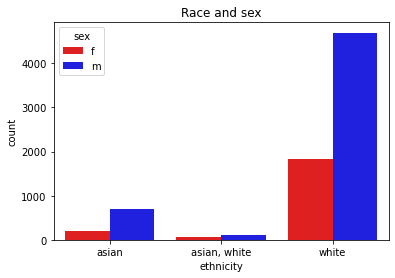

In [7]:
aw_bar = asian_whites.groupby(["sex","ethnicity"]).count()["age"].reset_index().rename(columns={"age": "count"})

# plots the graph
flatui = ["red", "blue"]
sns.set_palette(flatui)
sns.barplot(x="ethnicity", y="count", hue = "sex", data=aw_bar).set(title="Race and sex")

We note that OKCupid has over twice as many males compared to females. In addition, whites are the most common, followed by Asians, then by biracial Asian and Caucasians. The gender and race imbalance may mar the predictive ability of this data.

### Age, income and height

In [8]:
asian_whites.groupby(["sex","ethnicity"]).mean()

age     height         income
sex ethnicity                                        
f   asian         30.738095  63.419048   73190.476190
    asian, white  28.842105  63.701754  109649.122807
    white         34.761618  65.696555   81689.447786
m   asian         30.365057  68.413352  103835.227273
    asian, white  30.820513  70.119658  120940.170940
    white         33.624334  71.107607  104768.804603

The age demographic of OKCupid is lower on average for those who are mixed Asian and white, as well as Asian; there appears to be no significant difference among sex. The self-reported income for males is higher than for females, and higher for biracial people compared to either race. In terms of height, the self-reported height of Asians is shorter than that of whites, with biracial people falling in between. Even though this gives potentially useful demographic information, it is self-reported, meaning that it is subject to bias.

### Income

This is the distribution of incomes.

[Text(0.5, 1.0, 'Income distribution by sex')]

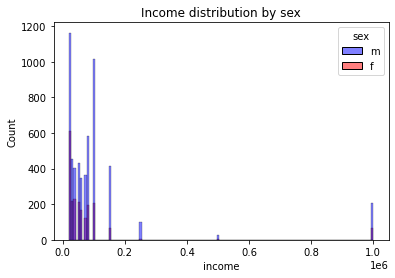

In [9]:
flatui = ["blue","red"]
sns.set_palette(flatui)
sns.histplot(asian_whites,x="income",hue="sex").set(title="Income distribution by sex")


This graph is badly right-skewed, so a logarithmic transformation is applied to mitigate this issue.

[Text(0.5, 1.0, 'Income distribution by sex')]

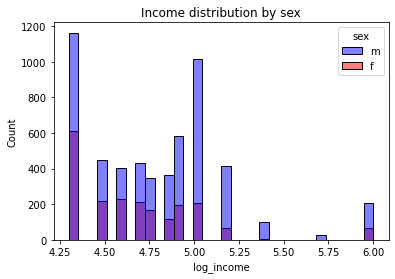

In [10]:
asian_whites["log_income"] = asian_whites["income"].apply(lambda x: math.log(x) / math.log(10))
sns.histplot(asian_whites,x="log_income",hue="sex").set(title="Income distribution by sex")

Even though this is marred by skew, it is still better.

### Self-Report Bias and Other Inaccuracies

The self-reported nature of the data means that there is inherent bias or inconsistency. For example, a person can lie about their height to make themselves appear more desirable. Even if the person reports the height they actually measured, the measurement may be incorrect due to sloppy measurement. As illustrated below, there is a discrepancy of around 1 to 2 inches when reporting height on OKCupid, as when compared to the average meausred height as indicated on Fryar et al., 2021.

| Race, gender | OKC Reported Height | Measured Average Height | Discrepancy | 
|-----|-----|-----|-----|
| Asian, female | 5'3.4" | 5'1.5" | 1.9" |
| Asian, male | 5'8.4" | 5'7.1" | 1.3" |
| Caucasian, female | 5'5.7" | 5'3.9" | 1.8" |
| Caucasian, male | 5'11.1" | 5'9.6" | 1.5" |

Just like with height, people will be inclined to exaggerate their income to make themselves appear more desirable; the average 30-year-old male will claim to overstate their income by 25%, while the average 30-year-old female will overstate it by 20%. At middle age, this becomes especially problematic, as the average male will overstate their income by around 35%, while the average female will overstate their income by around 30%. (OKCupid, 2010)

Reporting race is not completely accurate, as even though the profile of the person may give away race, someone may be a mix of another race without being aware of this. In addition, someone may only list one race despite being mixed, whether they aware of it or not.

### Lifestyle details

There are many descriptors that can describe someone, such as the drinking or drugs portions of the profile. Many fall along a scale and can be ordered, such as with drinking frequency. However, some do not fall under this, such as religion.

Again, these details are self-reported, so there will be self-report bias. For example, an alcoholic may not want to describe their drinking habits as if to imply alcoholism or otherwise intentionally distort this information to appear better.

#### Religion

Religion is included, as the religions practised may differ by demographic. Even though this data also includes information relating to devoutness, I did not include this data as it may overcomplicate the data analysis.

Text(0.5, 1.0, 'Religion among different races and sexes')

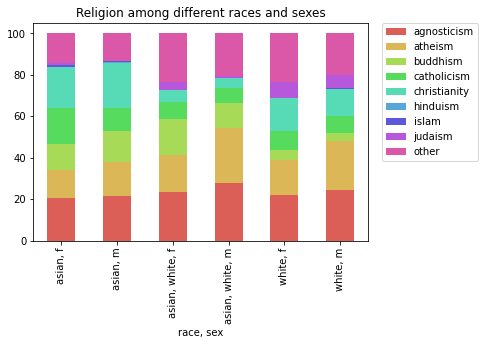

In [11]:
# filter by religion
reli = asian_whites.groupby(["sex","ethnicity","religion"]).count()["age"].reset_index()
reli["religion"] = reli["religion"].apply(lambda x: x.split()[0])
reli.groupby(["sex","ethnicity","religion"]).sum()["age"].reset_index()

# Makes a new column for both race and ethnicity
reli["race, sex"] = reli["ethnicity"] + ", " + reli["sex"]
reli = reli.rename(columns={"age":"count"})
reli.drop(columns = ["sex","ethnicity"])

# Makes a pivot table of religions
religion = pd.pivot_table(reli, values = "count", columns = "religion", index = "race, sex", aggfunc=np.sum).reset_index()
religion = religion.fillna(0)

# Takes a sum to find the percentage
details = religion["race, sex"]
religion["sum"]  = religion.drop(columns = "race, sex").apply(np.sum, axis=1)
religion["race, sex"] = details

religion
religion = religion.loc[:,"agnosticism":"other"].div(religion["sum"], axis = 0)
religion_percent = religion.applymap(lambda x: 100 * x)

# Adds the details back again, which were removed to ensure the sum worked properly
religion_percent["race, sex"] = details

# Plots the chart
sns.set_palette("hls",9)

religion_percent.plot(x = "race, sex", kind = "bar", stacked = True)

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.title("Religion among different races and sexes",size=12)

Those who are mixed Asian and white are least likely to identify as Christian, while also nearly as likely to identify as Buddhist as Asians, much more than whites. In addition, Asians are more likely to identify as Muslim, while whites are more likely to identify as Jewish, with some biracial males identifying as Jewish.

#### Diet

There are many possible diets here, but some are redundant; for example, both "vegetarian" and "strictly vegetarian" are treated as being "vegetarian" as both should mean the same thing. The "other" category includes diets such as Halal and Kosher, as the pescetarian diet is assumed to be in the "mostly vegetarian" category.

Text(0.5, 1.0, 'Diet among different races and sexes')

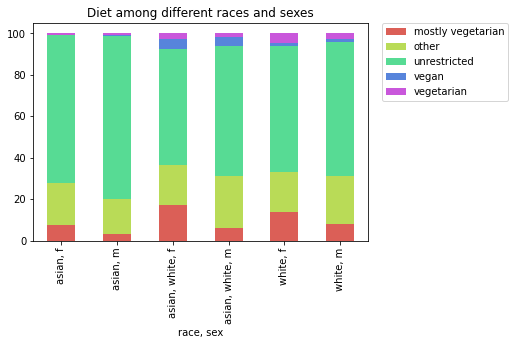

In [12]:
# filter by diet
diet = asian_whites.groupby(["sex","ethnicity","diet"]).count()["age"].reset_index()

# simplifies diet type
def diet_simplify(diet):
    if diet in ["anything","mostly anything"]:
        return "unrestricted"
    elif diet == "mostly vegetarian":
        return "mostly vegetarian"
    elif diet in ["strictly vegetarian","vegetarian"]:
        return "vegetarian"
    elif diet in ["vegan", "strictly vegan"]:
        return "vegan"
    else:
        return "other"

diet["diet"] = diet["diet"].apply(lambda x: diet_simplify(x))    

# Similar code format to "Religion"    
diet["race, sex"] = diet["ethnicity"] + ", " + diet["sex"]
diet = diet.rename(columns={"age":"count"})
diet.drop(columns = ["sex","ethnicity"])

diets = pd.pivot_table(diet, values = "count", columns = "diet", index = "race, sex", aggfunc=np.sum).reset_index()
diets = diets.fillna(0)

details = diets["race, sex"]
diets["sum"] = diets.drop(columns = "race, sex").apply(np.sum, axis=1)
diets["race, sex"] = details

diets = diets.loc[:,"mostly vegetarian":"vegetarian"].div(diets["sum"], axis = 0)
diets_percent = diets.applymap(lambda x: 100 * x)

diets_percent["race, sex"] = details

sns.set_palette("hls",5)

diets_percent.plot(x = "race, sex", kind = "bar", stacked = True)

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.title("Diet among different races and sexes",size=12)

Those who are mixed Asian and white appear most likely to identify as vegan, as those who are white are most likely to identify as vegetarian. Women are more likely to identify as vegetarian.

#### Body type

Even though body type is only partly related to lifestyle, it is categorically similar when compared to the other lifestyle preferences. Note here that positive is used to denote the terms "athletic," "curvy," "full figured," "fit" and "jacked," which are generally used in a more approving matter; it has nothing to do with "body positivity."

Text(0.5, 1.0, 'Body types among different races and sexes')

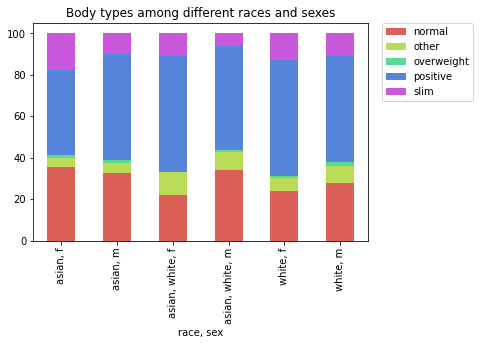

In [13]:
body = asian_whites.groupby(["sex","ethnicity","body_type"]).count()["age"].reset_index()

# simplifies body type
def body_simplified(type):
    if type in ["athletic", "curvy", "full figured", "fit", "jacked"]:
        return "positive"
    elif type in ["skinny","thin"]:
        return "slim"
    elif type in ["a little bit extra","overweight"]:
        return "overweight"
    elif type == "average":
        return "normal"
    else:
        return "other"

body["body_type"] = body["body_type"].apply(lambda x: body_simplified(x))    

# Similar code format to "Religion"
body["race, sex"] = body["ethnicity"] + ", " + body["sex"]
body = body.rename(columns={"age":"count"})
body.drop(columns = ["sex","ethnicity"])

body = pd.pivot_table(body, values = "count", columns = "body_type", index = "race, sex", aggfunc=np.sum).reset_index()
body = body.fillna(0)

details = body["race, sex"]
body["sum"] = body.drop(columns = "race, sex").apply(np.sum, axis=1)
body["race, sex"] = details

body = body.loc[:,"normal":"slim"].div(body["sum"], axis = 0)
body_percent = body.applymap(lambda x: 100 * x)

body_percent["race, sex"] = details

sns.set_palette("hls",5)

body_percent.plot(x = "race, sex", kind = "bar", stacked = True)

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.title("Body types among different races and sexes",size=12)

Even with many people in the USA being overweight, few people want to admit to being overweight on OKCupid. The only noticeable difference is that those who are mixed Asian and white appear to be less likely to put "overweight" but less likely to put "slim." In terms of using "normal", both mixed Asian/whites and whites females are less likely to put "normal."

#### Drinking habits

Text(0.5, 1.0, 'Drinking habits among different races and sexes')

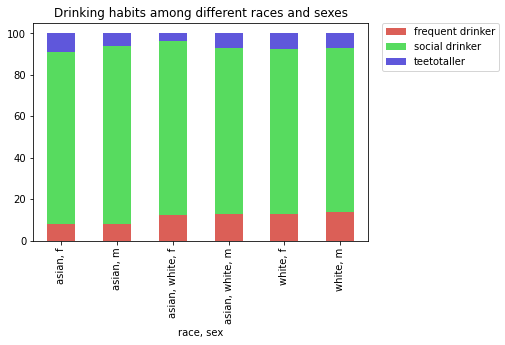

In [14]:
alcohol = asian_whites.groupby(["sex","ethnicity","drinks"]).count()["age"].reset_index()

def alc(type):
    if type == "not at all":
        return "teetotaller"
    elif type in ["rarely","socially"]:
        return "social drinker"
    else:
        return "frequent drinker"

alcohol["drinks"] = alcohol["drinks"].apply(lambda x: alc(x))    

# Similar code format to "Religion"
alcohol["race, sex"] = alcohol["ethnicity"] + ", " + alcohol["sex"]
alcohol = alcohol.rename(columns={"age":"count"})
alcohol.drop(columns = ["sex","ethnicity"])

alcohol = pd.pivot_table(alcohol, values = "count", columns = "drinks", index = "race, sex", aggfunc=np.sum).reset_index()
alcohol = alcohol.fillna(0)

details = alcohol["race, sex"]
alcohol["sum"] = alcohol.drop(columns = "race, sex").apply(np.sum, axis=1)
alcohol["race, sex"] = details

alcohol = alcohol.loc[:,"frequent drinker":"teetotaller"].div(alcohol["sum"], axis = 0)
alcohol_percent = alcohol.applymap(lambda x: 100 * x)

alcohol_percent["race, sex"] = details

sns.set_palette("hls",3)

alcohol_percent.plot(x = "race, sex", kind = "bar", stacked = True)

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.title("Drinking habits among different races and sexes",size=12)

There is not too much conclusive here, except that those who are of mixed race or Caucasian are more likely to be frequent drinkers.

### Word analysis

In addition, we can analyze words used in the biography, as well as descriptors. This might provide into issues that may affect people of certain races, especially with under-studied mixed Asian and Caucasian people. Here is the prompt of the first user in this database:

In [15]:
for i in range(21,31):
    print("Prompt " + str(i-20) + ": " + okc.iloc[0,i])

Prompt 1: about me:  i would love to think that i was some some kind of intellectual: either the dumbest smart guy, or the smartest dumb guy. can't say i can tell the difference. i love to talk about ideas and concepts. i forge odd metaphors instead of reciting cliches. like the simularities between a friend of mine's house and an underwater salt mine. my favorite word is salt by the way (weird choice i know). to me most things in life are better as metaphors. i seek to make myself a little better everyday, in some productively lazy way. got tired of tying my shoes. considered hiring a five year old, but would probably have to tie both of our shoes... decided to only wear leather shoes dress shoes.  about you:  you love to have really serious, really deep conversations about really silly stuff. you have to be willing to snap me out of a light hearted rant with a kiss. you don't have to be funny, but you have to be able to make me laugh. you should be able to bend spoons with your mind,

Prompt 1 appears to be an "about me."

Prompt 2 appears to be about careers.

Prompt 3 appears to be about strengths.

Prompt 4 appears to be about personality, or what makes the person stand out.

Prompt 5 appears to be about favourites (ex: movies, TV shows, etc.).

Prompt 6 appears to be a "describe yourself in 5 words," possibly about things needed.

Prompt 7 is hard to delineate, but seems to be about what the person likes, perhaps idiosyncratic.

Prompt 8 appears to be about what the person's day is like (or an ideal day).

Prompt 9 is hard to tell, as it seems to be a generic introduction.

Prompt 10 appears to be about what the person is looking for in another person.

In [16]:
# combines words in essay 

# generates a list of essays
list_essay = []
for i in range(0,10):
    list_essay.append("essay"+str(i))

prompts = asian_whites[["ethnicity","sex"]+list_essay].dropna()

essay_asian = prompts[prompts["ethnicity"] == "asian"]
essay_mixed = prompts[prompts["ethnicity"] == "asian, white"]
essay_white = prompts[prompts["ethnicity"] == "white"]

def essay_split(num=0):
    # filter by sex and essay prompt number (with 0 index)
    def filter_sex_num(df,sex,essaynum = num):
        return df[df["sex"] == sex]["essay" + str(essaynum)]

    essay_af = filter_sex_num(essay_asian,"f",num)
    essay_am = filter_sex_num(essay_asian,"m",num)
    essay_mf = filter_sex_num(essay_mixed,"f",num)
    essay_mm = filter_sex_num(essay_mixed,"m",num)
    essay_wf = filter_sex_num(essay_white,"f",num)
    essay_wm = filter_sex_num(essay_white,"m",num)

    return [essay_af, essay_mf, essay_wf, essay_am, essay_mm, essay_wm]

all_prompts = []

# plots all plots
for p in range(0,10):    
    prompt_combined = []
    for i in essay_split(p):
        myessay = " ".join(list(filter(lambda x: isinstance(x,str),i)))
        prompt_combined.append(myessay)
    all_prompts.append(prompt_combined)

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)

In [18]:
# Makes word cloud
def make_wc(ess, w=400,h=500, mw=100):
    return WordCloud(width=w,height=h,background_color = "white",stopwords = stopwords,max_words = mw).generate(ess)

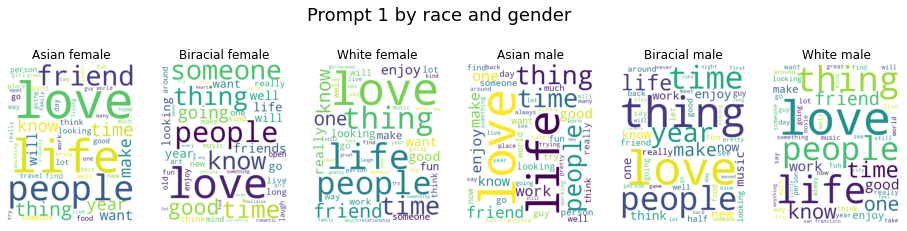

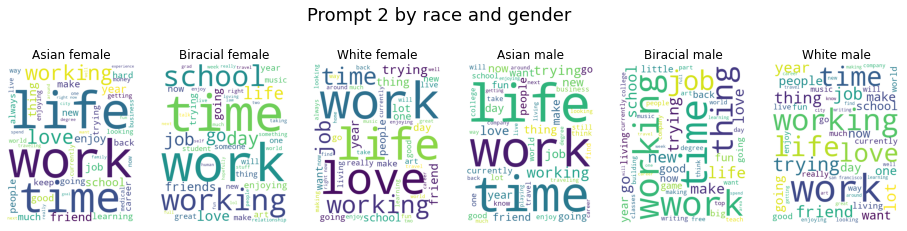

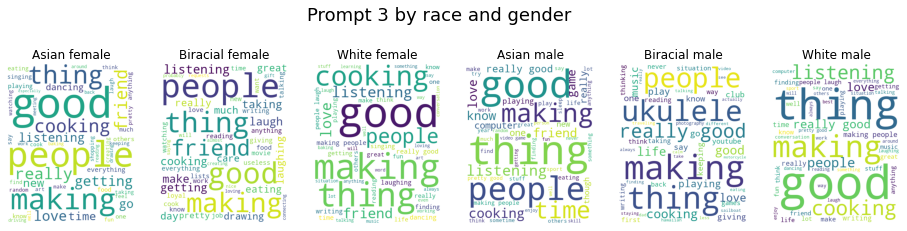

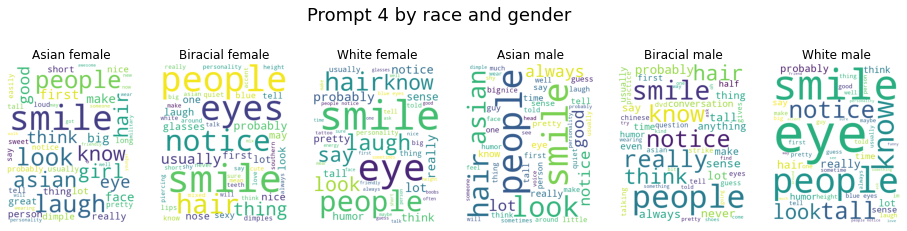

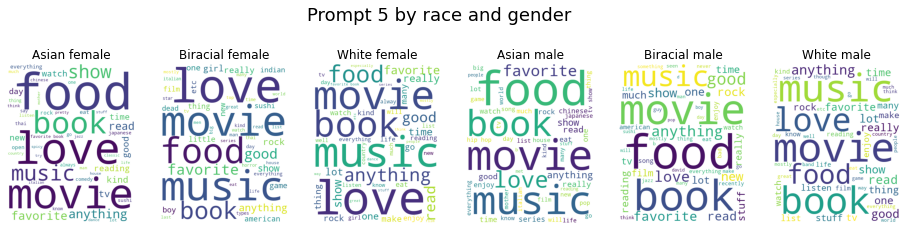

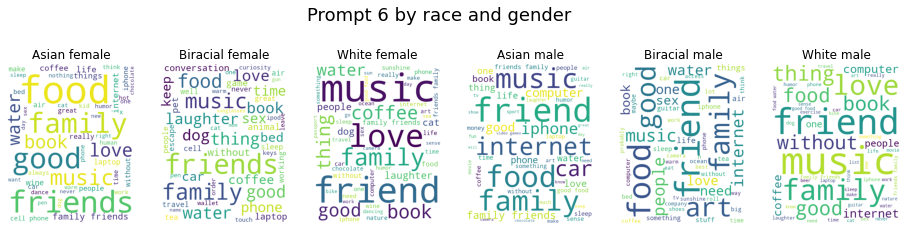

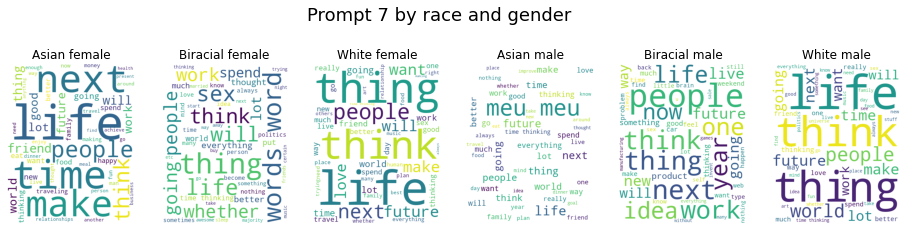

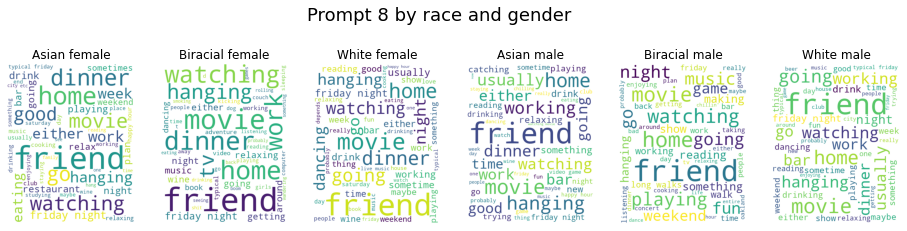

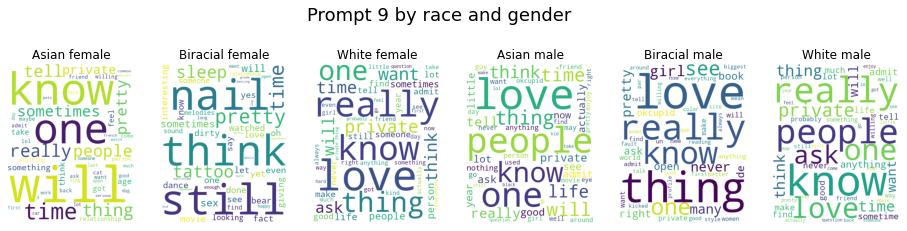

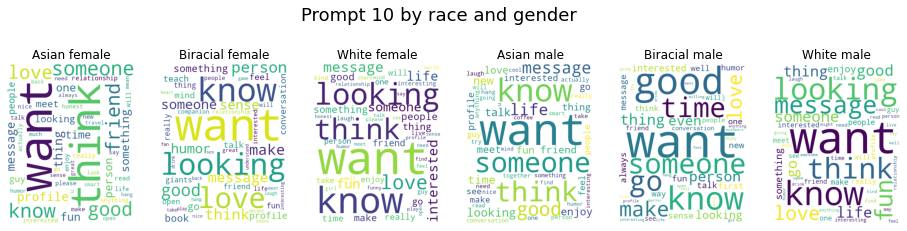

In [19]:
j = 1
# iterates the plotting ten times
for p in all_prompts:
    fig = plt.figure(figsize=(16,4))
    fig.suptitle("Prompt " + str(j) + " by race and gender",fontsize=18) 
    titles = ["Asian female","Biracial female","White female","Asian male","Biracial male","White male"]

    i = 1
    for e in p:
        wc = make_wc(e,mw=50)
        ax = fig.add_subplot(1,6,i)
        ax.set_title(titles[i-1])
        plt.imshow(wc)
        i += 1
        ax.axis("off")
    j += 1

These are the terms that I deem potentially relevant for predicting race.

| Prompt number | More brought up term | Race and gender | Possible reason for relevance |
|---------------|----------------------|-----------------|----------------------|
| 3 | "ukulele" | biracial men | It is a popular instrument in Hawaii, which may signify something related to culture. |
| 4 | "eye" \* | white | Caucasian eye shape differs from Asians, and blue eyes are found mainly in Caucasians. This may also suggest that Asians may be more insecure about their eyes, as some Asian women pay for double eyelid surgery to change the appearance of their eyes to a more Caucasian look. (Chow, 2014) |
| 5 | "music" | white, biracial women | Certain cultures may be more predisposed to talking about music. Moreover, music tastes might differ by culture. |
| 6 | "food" | Asians and biracial men | Asians may be particularly sensitive to Asian food in a Western country. |

\* The plural "eyes" is brought up a fair amount by biracial women.

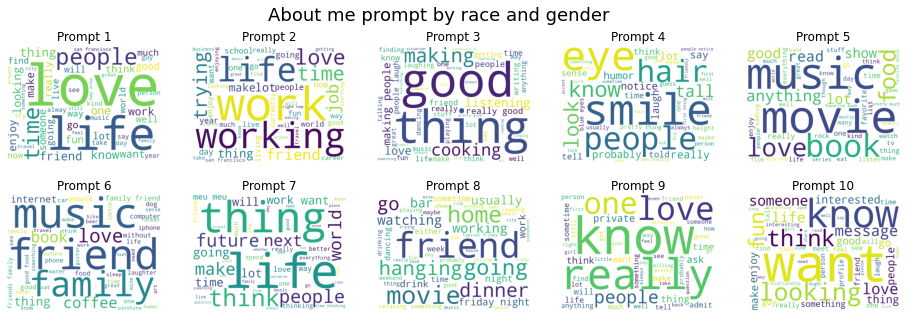

In [20]:
textprompts = []

# takes the columns for the text plots
for i in range(21,31):
    ess = asian_whites.iloc[:,i].dropna()
    ess = list(filter(lambda x: isinstance(x,str),ess))
    essay_text = " ".join(ess)
    textprompts.append(essay_text)
    
fig = plt.figure(figsize=(16, 5))
fig.suptitle("About me prompt by race and gender",fontsize=18)     

# plots all the 10 text prompts on the plot below
j = 1
for t in textprompts:
    wc = make_wc(t,w=800,h=600,mw=50)
    ax = fig.add_subplot(2,5,j)
    ax.set_title("Prompt " + str(j))
    plt.imshow(wc)
    j += 1
    ax.axis("off")

## Main analysis

Using evidently data related to demographics, religion, diet, drinking habits and essay prompts, this study will use a random forest to predict the race, perhaps to identify issues or cultures within a certain race, especially for mixed Asians and Caucasians, whom there are fewer studies on.

To analyze this, we use keywords that appear to differentiate races.

| Category | Potentially relevant Keywords |
|----------|---|
| Sex | m, f |
| Age | Value is numeric |
| Income | Value is numeric |
| Religion | buddhism, christianity, judaism, islam |
| Diet     | vegan, vegetarian |
| Body type    | overweight, normal, slim |
| Drinks | frequently |
| Essay 3 prompt | ukulele |
| Essay 4 prompt | eye |
| Essay 5 prompt | music |
| Essay 6 prompt | food |

In [21]:
# Reruns dataset to allow it to be reused when debugging
asian_whites = okc[okc["ethnicity"].isin(["asian","white","asian, white"])]
asian_whites = asian_whites[asian_whites["income"] != -1]
asian_whites["log_income"] = asian_whites["income"].apply(lambda x: math.log(x) / math.log(10))

asian_whites = asian_whites[["sex","ethnicity","age","log_income","religion","diet","body_type","drinks","essay2","essay3","essay4","essay5"]]

# Filtering religion, as well as replacing null values
asian_whites["religion"] = asian_whites["religion"].fillna("other").apply(lambda x: x.split()[0])

# religion split
def religion_split(r):
    if r in ["buddhism","christianity","judaism","islam"]:
        return r
    else:
        return "other"

# diet split    
def diet_split(d):
    if d in ["vegetarian","strictly vegetarian"]:
        return "vegetarian"
    elif d in ["vegan","strictly vegan"]:
        return "vegan"
    else:
        return "other"

# body type split        
def body_type_split(bt):
    if bt in ["a little bit extra", "overweight"]:
        return "overweight"
    elif bt in ["thin","skinny"]:
        return "slim"
    elif bt == "normal":
        return "normal"
    else:
        return "other"

# drinking habit split 
def drinking_split(dr):
    if dr in ["not at all","rarely","socially","other"]:
        return "other"
    else:
        return "frequently"

# term split by each essay
def essay_three(e):
    if "ukulele" in e:
        return "ukulele"

def essay_four(e):
    if "eye" in e:
        return "eye"

def essay_five(e):
    if "music" in e:
        return "music"

def essay_six(e):
    if "food" in e:
        return "food"
    
def ethnicity_to_number(e):
    if e == "asian":
        return 0
    elif e == "white":
        return 2
    else:
        return 1

In [22]:
# where the data splitting actually happens for them to later be dummy variables
asian_whites["religion"] = asian_whites["religion"].apply(religion_split)
asian_whites["diet"] = asian_whites["diet"].fillna("other").apply(diet_split)
asian_whites["body_type"] = asian_whites["body_type"].fillna("other").apply(body_type_split)
asian_whites["drinks"] = asian_whites["drinks"].fillna("other").apply(drinking_split)
asian_whites["essay2"] = asian_whites["essay2"].fillna("other").apply(essay_three)
asian_whites["essay3"] = asian_whites["essay3"].fillna("other").apply(essay_four)
asian_whites["essay4"] = asian_whites["essay4"].fillna("other").apply(essay_five)
asian_whites["essay5"] = asian_whites["essay5"].fillna("other").apply(essay_six)
asian_whites["ethnicity"] = asian_whites["ethnicity"].apply(ethnicity_to_number)

asian_whites["essay5"] = asian_whites["essay5"]
asian_whites = asian_whites.fillna("other")


X = asian_whites.drop("ethnicity", axis = 1)
X = pd.get_dummies(X)
y = asian_whites["ethnicity"]
X = X.drop(["sex_f","religion_other","diet_other","body_type_other","drinks_other",
            "essay2_other","essay3_other","essay4_other","essay5_other"], axis = 1)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7610 entries, 1 to 59943
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7610 non-null   int64  
 1   log_income             7610 non-null   float64
 2   sex_m                  7610 non-null   uint8  
 3   religion_buddhism      7610 non-null   uint8  
 4   religion_christianity  7610 non-null   uint8  
 5   religion_islam         7610 non-null   uint8  
 6   religion_judaism       7610 non-null   uint8  
 7   diet_vegan             7610 non-null   uint8  
 8   diet_vegetarian        7610 non-null   uint8  
 9   body_type_overweight   7610 non-null   uint8  
 10  body_type_slim         7610 non-null   uint8  
 11  drinks_frequently      7610 non-null   uint8  
 12  essay2_ukulele         7610 non-null   uint8  
 13  essay3_eye             7610 non-null   uint8  
 14  essay4_music           7610 non-null   uint8  
 15  ess

In [24]:
# train and test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size = 0.75, random_state = 111)

In [25]:
# random forest classifier
param_grid = {"max_depth": [2,4,8,16],
             "n_estimators": [40,80]}
rf_grid = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
                                               param_grid, cv=5, scoring='neg_mean_squared_error')

rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=80)

In [26]:
rfc_best = sklearn.ensemble.RandomForestClassifier(random_state=111, n_jobs=-1, max_depth=8,
                                       n_estimators=40, oob_score=True)
rfc_best.fit(X_train,y_train)
rfc_best.oob_score_

0.8613982828105835

In [27]:
preds = rfc_best.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.42      0.03      0.06       233
           1       0.00      0.00      0.00        49
           2       0.85      0.99      0.92      1621

    accuracy                           0.85      1903
   macro avg       0.43      0.34      0.33      1903
weighted avg       0.78      0.85      0.79      1903

[[   8    0  225]
 [   0    0   49]
 [  11    0 1610]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Even though this seems to be reasonably accurate, it never identifies someone who is mixed asian and Caucasian.

| Actual race / Assumed race | Asian | Mixed | White |
| ----- | ---- | ---- | ---- |
| Asian | 8    | 0 | 225 |
| Mixed |   0   | 0    |49 |
| White |  11   | 0 | 1610 |

In [28]:
# fix index issue
asian_whites = asian_whites.reset_index()
asian_whites = asian_whites.drop(columns = "index")

# train and test, similarly done to problem set 7

train=asian_whites.sample(frac=0.75,random_state=111) 
test=asian_whites.drop(train.index)

In [29]:
cat_features = "C(religion) + C(diet) + C(body_type) + C(drinks) + C(essay2) * C(essay3) * C(essay4) * C(essay5)"

y, X = patsy.dmatrices("ethnicity ~ C(sex) * age * log_income + C(sex) :(" + cat_features + ")",
                       asian_whites, return_type='matrix')

y = y.flatten()
y_train = y[train.index]
X_train = X[train.index]
y_test = y[test.index]
X_test = X[test.index]
X_train

array([[  1.        ,   1.        ,   0.        , ...,   5.        ,
        135.        , 135.        ],
       [  1.        ,   1.        ,   0.        , ...,   4.69897   ,
        117.47425011, 117.47425011],
       [  1.        ,   1.        ,   0.        , ...,   5.17609126,
        160.45882903, 160.45882903],
       ...,
       [  1.        ,   1.        ,   0.        , ...,   4.47712125,
        125.35939513, 125.35939513],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        134.31363764,   0.        ],
       [  1.        ,   1.        ,   0.        , ...,   4.60205999,
        138.06179974, 138.06179974]])

In [30]:
# random forest classifier
param_grid = {"max_depth": [2,4,8,16],
             "n_estimators": [20,40,80]}
rf_grid = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
                                               param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=20)

In [31]:
rfc_best = sklearn.ensemble.RandomForestClassifier(random_state=222, n_jobs=-1, max_depth=8,
                                       n_estimators=80, oob_score=True)

rfc_best.fit(X_train,y_train)
rfc_best.oob_score_ 

0.8591450595655221

In [32]:
preds = rfc_best.predict(X_test)
print(confusion_matrix(y_test,preds))

[[   0    0  238]
 [   0    0   46]
 [   0    0 1618]]


This is arguably even worse, because it assumes every user is white, which is not true.

The lack of mixed Asian/Caucasian users significantly mars the quality of the model. To make this model less lopsided, we will take all users who are mixed Asian/white, and include equal numbers of users who are completely Caucasian and completely Asian.

In [33]:
asian_whites.groupby("ethnicity").count()

,sex,age,log_income,religion,diet,body_type,drinks,essay2,essay3,essay4,essay5
ethnicity,,,,,,,,,,,
0,914,914,914,914,914,914,914,914,914,914,914
1,174,174,174,174,174,174,174,174,174,174,174
2,6522,6522,6522,6522,6522,6522,6522,6522,6522,6522,6522


We have 174 users who are mixed Asian and Caucasian.

In [34]:
asian_sample = asian_whites[asian_whites["ethnicity"] == 0].sample(n=174,random_state=111)
white_sample = asian_whites[asian_whites["ethnicity"] == 2].sample(n=174,random_state=111)
mixed_sample = asian_whites[asian_whites["ethnicity"] == 1]

aw_equal = pd.concat([asian_sample, white_sample, mixed_sample])

In [35]:
# fix index issue
aw_equal = aw_equal.reset_index()
aw_equal = aw_equal.drop(columns = "index")

In [36]:
# train and test, similarly done to problem set 7

train=aw_equal.sample(frac=0.75,random_state=111) 
test=aw_equal.drop(train.index)

cat_features = "C(religion) + C(diet) + C(body_type) + C(drinks) + C(essay2) * C(essay3) * C(essay4) * C(essay5)"

y, X = patsy.dmatrices("ethnicity ~ C(sex) * age * log_income + C(sex) :(" + cat_features + ")",
                       aw_equal, return_type='matrix')

y = y.flatten()
y_train = y[train.index]
X_train = X[train.index]
y_test = y[test.index]
X_test = X[test.index]
X_train

array([[  1.        ,   1.        ,   0.        , ...,   4.47712125,
        107.45091011, 107.45091011],
       [  1.        ,   1.        ,   0.        , ...,   4.30103   ,
         98.9236899 ,  98.9236899 ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        134.31363764,   0.        ],
       ...,
       [  1.        ,   1.        ,   0.        , ...,   4.77815125,
        119.45378126, 119.45378126],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        124.23193251,   0.        ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        165.        ,   0.        ]])

In [37]:
# random forest classifier
param_grid = {"max_depth": [2,4,8,16],
             "n_estimators": [20,40,80]}
rf_grid = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
                                               param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=20)

In [38]:
rfc_best = sklearn.ensemble.RandomForestClassifier(random_state=222, n_jobs=-1, max_depth=4,
                                       n_estimators=20, oob_score=True)

rfc_best.fit(X_train,y_train)
rfc_best.oob_score_ 

0.40561224489795916

In [39]:
preds = rfc_best.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.40      0.49      0.44        45
         1.0       0.41      0.41      0.41        46
         2.0       0.41      0.31      0.35        39

    accuracy                           0.41       130
   macro avg       0.41      0.40      0.40       130
weighted avg       0.41      0.41      0.40       130

[[22 13 10]
 [20 19  7]
 [13 14 12]]


| Actual race / Assumed race | Asian | Mixed | White |
| ----- | ---- | ---- | ---- |
| Asian | 22   | 13 | 10 |
| Mixed |   20   | 19    | 7 |
| White |  13   | 14 | 12 |

The accuracy of this model with the assumption that each sample size is the same, is abysmal, with around 60 percent of predictions being wrong. However, one interesting finding is that a machine learning model would much more likely erroneously consider a person who is mixed Asian and white to be "Asian" rather than white, even more so than Asians.

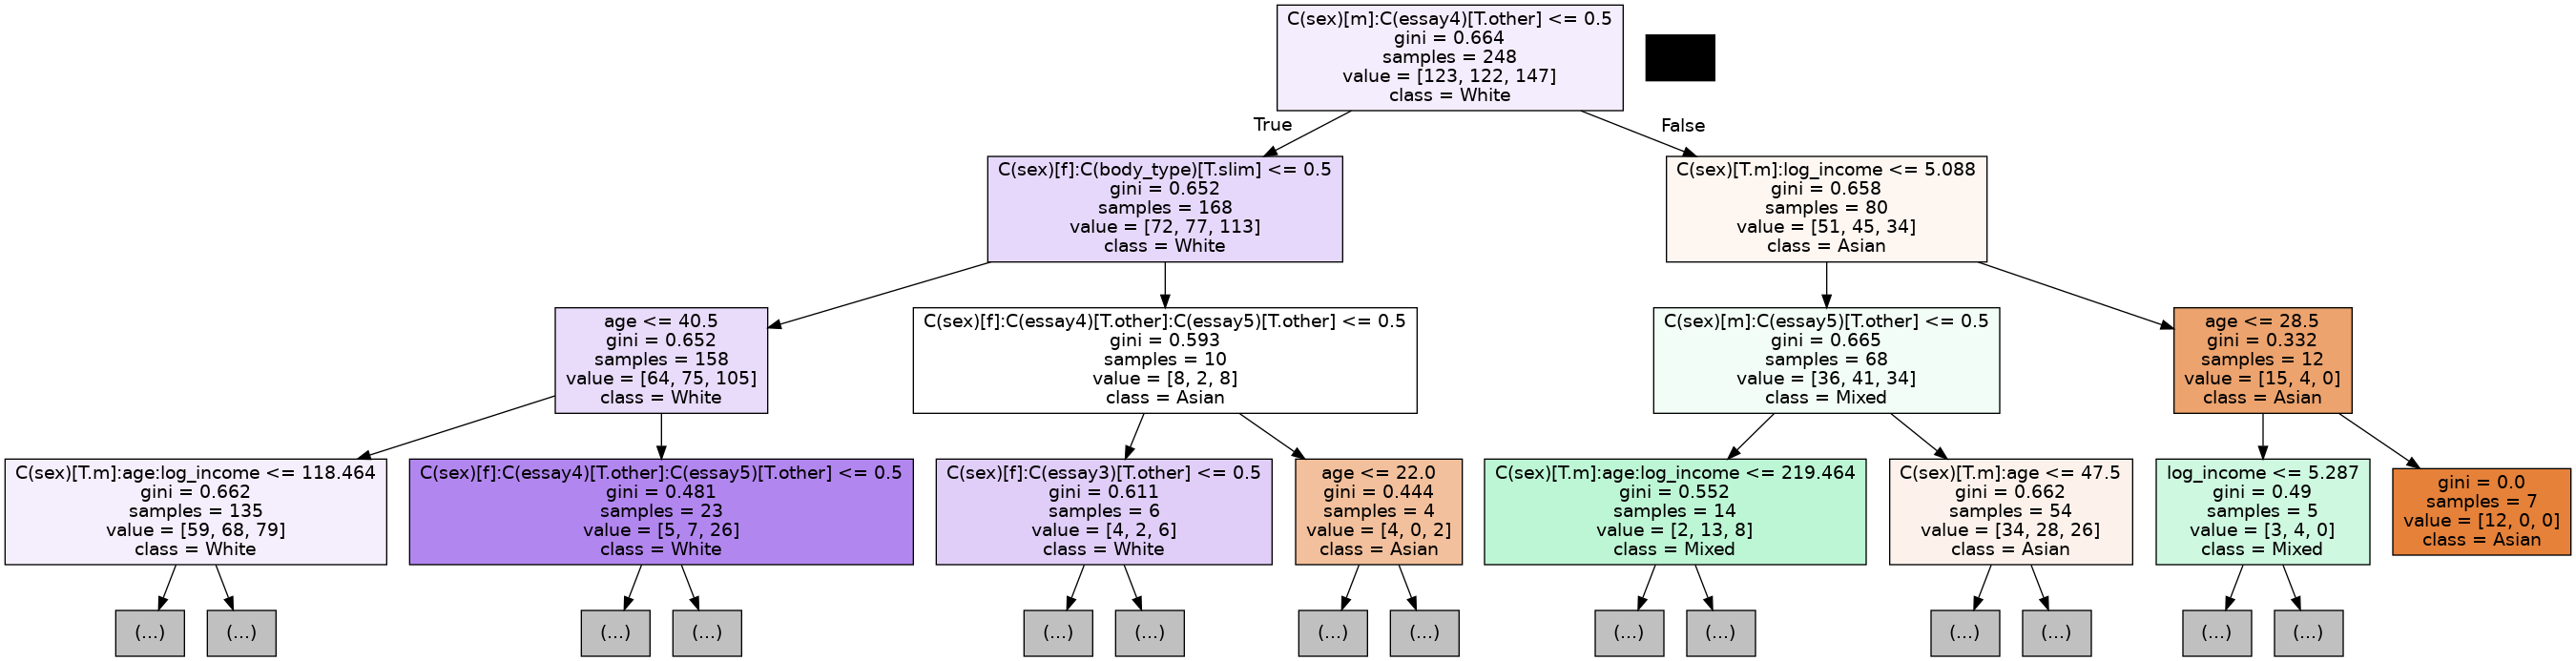

In [40]:
# plots chart
dict_X = X.__dict__
col_names = dict_X.get("design_info").column_names

sklearn.tree.export_graphviz(rfc_best.estimators_[0],
                             'tree.dot',
                             feature_names=col_names,
                             class_names=["Asian","Mixed","White"],
                             filled = True,
                            max_depth=3)

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image("tree.png")

This is the visualization for the first tree of the random forest. It is hard to understand due to its copious use of interaction variables.

### Simplified model without interaction terms

In [41]:
X = aw_equal.drop("ethnicity", axis = 1)
X = pd.get_dummies(X)
y = aw_equal["ethnicity"]
X = X.drop(["sex_f","religion_other","diet_other","body_type_other","drinks_other",
            "essay2_other","essay3_other","essay4_other","essay5_other"], axis = 1)

In [42]:
# train and test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size = 0.75, random_state = 111)

In [43]:
# random forest classifier
param_grid = {"max_depth": [2,4,8,16],
             "n_estimators": [15,20,40,80]}
rf_grid = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
                                               param_grid, cv=5, scoring='neg_mean_squared_error')

rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=80)

In [44]:
rfc_best = sklearn.ensemble.RandomForestClassifier(random_state=111, n_jobs=-1, max_depth=4,
                                       n_estimators=80, oob_score=True)
rfc_best.fit(X_train,y_train)
rfc_best.oob_score_

0.41687979539641945

In [45]:
preds = rfc_best.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.38      0.57      0.46        40
           1       0.35      0.31      0.33        42
           2       0.65      0.45      0.53        49

    accuracy                           0.44       131
   macro avg       0.46      0.44      0.44       131
weighted avg       0.47      0.44      0.44       131

[[23 13  4]
 [21 13  8]
 [16 11 22]]


| Actual race / Assumed race | Asian | Mixed | White |
| ----- | ---- | ---- | ---- |
| Asian | 23   | 13 | 4 |
| Mixed |   21   | 13    | 8 |
| White |  16   | 11 | 22 |

The accuracy is still poor, but it appears to be better. This model does seem to classify Asians as being closer to those who are mixed than Caucasians, although it groups more Caucasians as Asians than mixed race. However, it loses its ability in predicting who is mixed Asian and Caucasian.

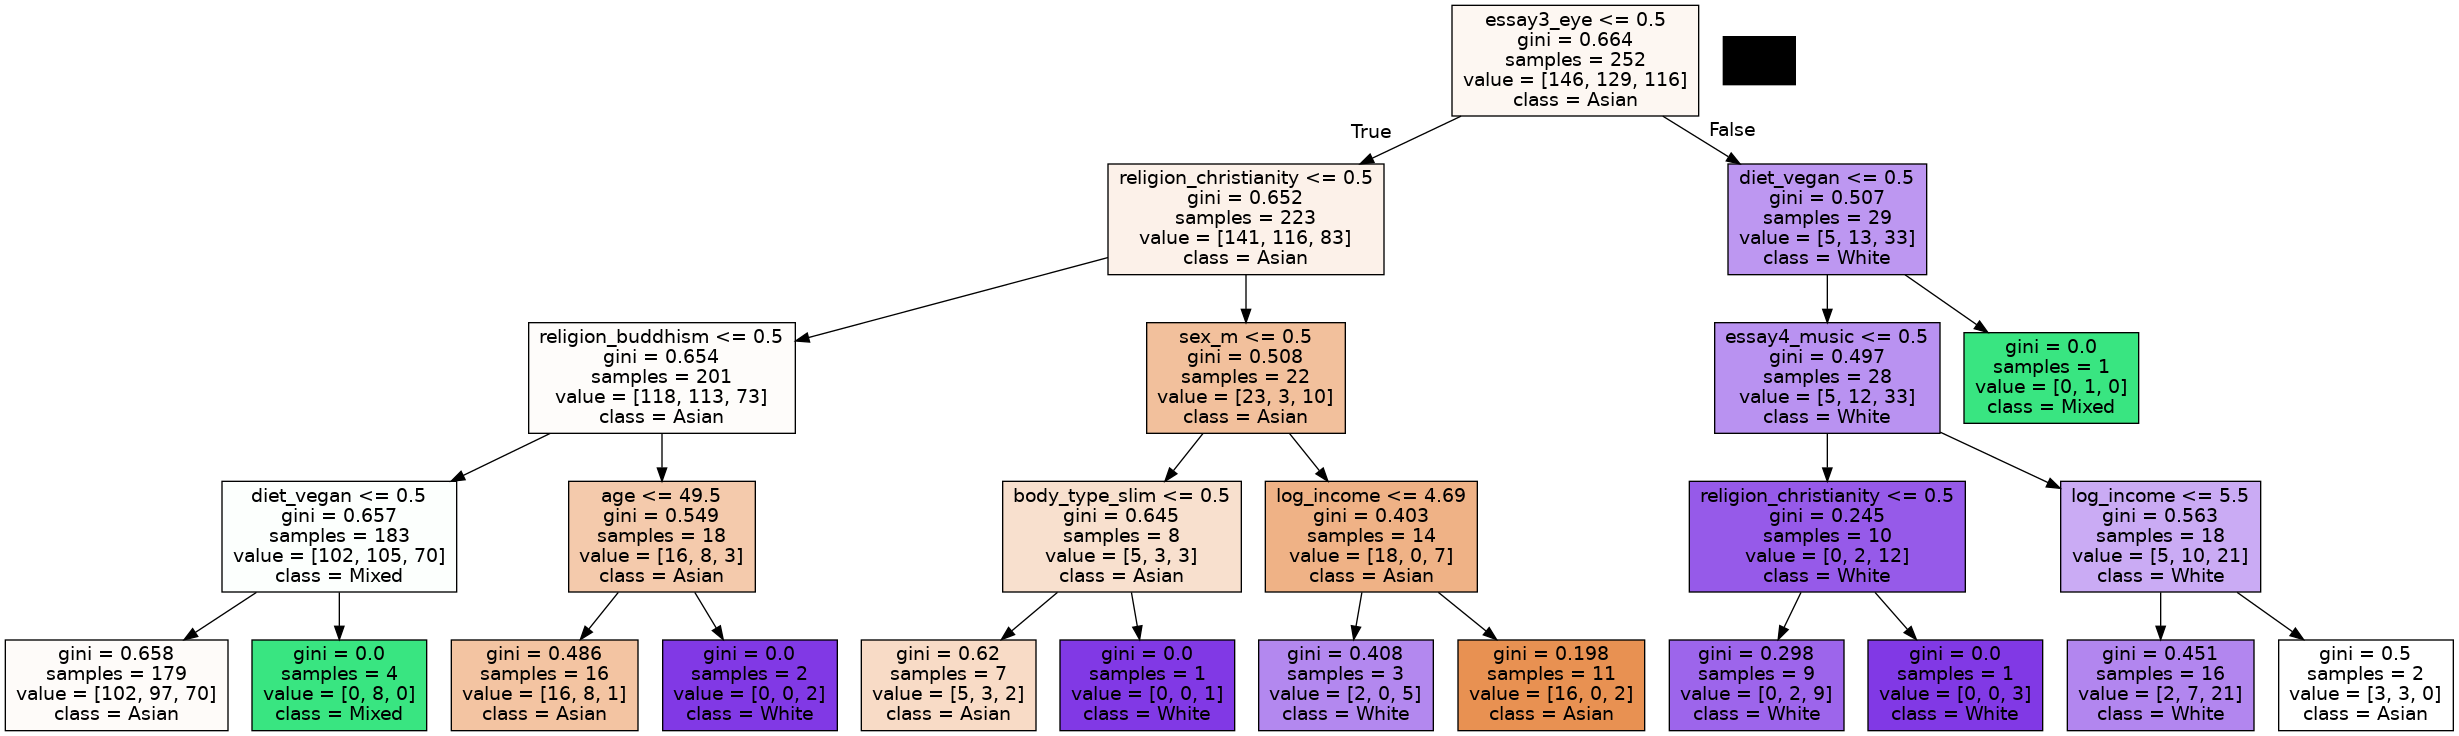

In [46]:
sklearn.tree.export_graphviz(rfc_best.estimators_[0],
                             'tree.dot',
                             feature_names=X.columns,
                             class_names=["Asian","Mixed","White"],
                             filled = True,
                            max_depth=4)

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image("tree.png")

This is the first tree of the branch, and it is more understandable than the previous chart, which has a litany of interaction terms. As random forests are able to detect interaction terms to a certain extent, these are not particularly helpful here and can overcomplicate the data.

### Conclusion

This data is only based on analysis of the first tree, where trees can be problematic due to overfitting. However, the observations through random forest are consistent with the preliminary analysis.

People who are mixed Asian and Caucasian appear to be more likely to be vegan, are more likely to not identify as Christian, and may still identify as Buddhist. In addition, Asians appear less likely to bring up eyes on their essay prompts, and after filtering for religion and sex, are younger, less likely to identify as slim, and make more income. Finally, whites are more likely to bring up eyes on their biography, and are more willing to bring up music on the essay prompt. The mix of traits with biracial people may indicate that those who are mixed are willing to assume both traits found in Asians and Caucasians. 

This data suggests that mixed race people are more likely to be vegan, a growing trend; this may imply that these people are more likely to adopt new trends. In addition, they may be more religiously diverse, as some adopt Buddhism despite it not being a majority religion in the United States, perhaps indicating that they are more tolerant overall.

However, this data has its own limitations. While this data gives considerable insight as to how mixed Asian and Caucasian people differ from monoracial people, it is imperfect due to distortion from self-report and certain demographic groups being much more prevalent. In addition, it may not be fully applicable to other contexts, such as how San Francisco may differ from Vancouver (or any other place in the world for that matter) in terms of issues affecting different races or in terms of the demographics thereof.

## Further Studies

This study includes data that has been found only in San Francisco. Finding other data outside of San Francisco, or more and new data of users in the city may violate privacy laws or otherwise be unfeasible. With social media sites being able to gather considerable amounts of information, it may be possible to gather data relating to people. However, these studies may be biased, as they would be skewed to those using the service, such as how this dataset gathers data from OKCupid users only (and is also skewed as this is only data for San Francisco users). In addition, there may be certain self-reported features on a social media site that are biased, just like overstated height and income.

### Analysis of other races

Further studies could analyze other mixed races, as well as those of at least three different races. This could give further insight about issues that affect those of mixed race, possibly including those of mixed Asian and Caucasian descent. Finally, analyses could be conducted for those of at least three races, including Asian and Caucasian.

### Updating the data

In addition, OKCupid's dataset treats the gender as binary: male and female; this fails to account for transgender men and women. It may be possible to study transgender users through analyzing biographies, although this is beyond the scope of this paper. In addition, some people identify as non-binary, although this OKCupid dataset failed to account for it, possibly due to being over 10 years old where being non-binary was less well-established.


In addition, lifestyle habits and overall user behaviour may change over time. Example include, but are not limited to the following: lifestyle habits like vegetarianism, smoking and alcohol consumption may change in popularity; people may be more or less willing to state their true religious beliefs; and younger, older, or otherwise different demographics may use OkCupid.



### Bibliography:

Chow, K. (2014, November 18). *The many stories behind double-eyelid surgery.* NPR https://www.npr.org/sections/codeswitch/2014/11/18/364670361/the-many-stories-behind-the-double-eyelid-surgery

Fryar, C. D., Carroll, M. D., Gu, Q., Afful, J., & Ogden, C. L. (2021). Anthropometric Reference Data for Children and Adults: United States, 2015-2018. *Vital & health statistics. Series 3, Analytical and epidemiological studies*, (36), 1–44.  https://www.cdc.gov/nchs/data/series/sr_03/sr03-046-508.pdf

Kim, A. Y., & Escobedo-Land, A. (2015). OkCupid data for introductory statistics and data science courses. *Journal of Statistics Education, 23(2).* https://doi.org/10.1080/10691898.2015.11889737

*OkCupid profiles. (2020, September 15).* Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/andrewmvd/okcupid-profiles

*The big lies people tell in online dating.*  (2010, July 7). OKCupid. https://theblog.okcupid.com/the-big-lies-people-tell-in-online-dating-a9e3990d6ae2

### Help used:

https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/ (for importing Kaggle)

https://hellochelsea.medium.com/okcupid-data-a-quick-example-of-data-analysis-and-visualization-with-python-3ce519b199fc (reading data)

https://www.geeksforgeeks.org/generating-word-cloud-python/ (making Word Clouds)

https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot (Moving legend outside of plot)

https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/ (random forest on categorical variable)

https://www.kaggle.com/carlmaps/iris-flower-classifier-using-random-forest (practice with classifier)

https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn (plotting random forest)

https://stackoverflow.com/questions/62111883/how-to-plot-the-random-forest-tree-corresponding-to-best-parameter (more about plotting random forest)

https://www.datasciencecentral.com/profiles/blogs/how-to-visualize-a-decision-tree-from-a-random-forest-in-python (even more about plotting random forest)

https://stackoverflow.com/questions/5316206/converting-dot-to-png-in-python (dot to PNG)